# Deliverable 2. Create a Customer Travel Destinations Map.
----
1. Create a folder called `Vacation_Search` to save all the files related with this deliverable.

2. Download the `Vacation_Search_starter_code.ipynb` Jupyter notebook,save it into your `Vacation_Search folder`, and rename it as `Vacation_Search.ipynb`.

3. In the `Vacation_Search.ipynb` file, ensure that the dependencies and the Google API key is imported correctly.

4. From the `Weather_Database` folder you created in the "Deliverable 1," import the `WeatherPy_Database.csv` file as a Pandas DataFrame named `city_data_df`.

5. Write two input statements that prompt the user to enter their minimum and maximum temperature criteria for their vacation.

6. Create a new Pandas DataFrame by using the `loc` Pandas method to filter the `city_data_df` DataFrame for temperature criteria  collected. Name the DataFrame as `preferred_cities_df`.

7. Create a new Pandas DataFrame named `clean_travel_cities` by using the Pandas `dropna` function on the `preferred_cities_df` to drop any empty rows.

8. Use the `copy` Pandas function to create a new DataFrame, called `hotel_df`, by copying the following columns from the `clean_travel_cities` DataFrame: "City", "Country", "Max Temp", "Current Description", "Lat", "Lng".

9. Add a new empty column named `Hotel Name` to the `hotel_df` DataFrame.

10. Review the hotel search parameters provided. These parameters are the same we used in this module; you'll use them to search for a hotel for each city.

11. Use a for loop to iterate through the `hotel_df` DataFrame, retrieve the latitude and longitude of each city to find the nearest hotel based on the search parameters provided, then add the hotel name to the `hotel_df` DataFrame. If a hotel isn't found, skip to the next city.

12. Drop any rows in the `hotel_df` DataFrame where a hotel name is not found and store the resulting data into a new DataFrame named `clean_hotel_df`.

13. Create an CSV file to store the `clean_hotel_df` DataFrame as `WeatherPy_vacation.csv` in the Vacation_Search folder.

14. Review the formatting template provided that you'll use to add an information box to each marker in the map. In the pop-up for each city you'll add:

    1. The city name.

    2. The country code.

    3. The weather description and maximum temperature for the city.

15. Review the provided list comprehension code to retrieve the city data from each row, which will then be added to the formatting template and saved in the `hotel_info` list.

16. Use the provided code snippet to retrieve the latitude and longitude from each row and store them in a new DataFrame called `locations`.

17. Refactor your previous marker layer map code to create a marker layer map that will have pop-up markers for each city on the map.

18. Take a screenshot of your map and save it to the `Vacation_Search` folder as `WeatherPy_vacation_map.png`.
---

## Ensure that the dependencies and the Google API key is imported correctly.

In [13]:
# Deliverable 6.2.3

# Dependencies and Setup
import pandas as pd
import requests
import gmaps
import numpy as np

# Import Google API key
from config import g_key

# Configure gmaps
gmaps.configure(api_key=g_key)

#import pretty print package and set up pretty printer
import pprint as pprint
pp = pprint.PrettyPrinter(indent = 4, width =80, compact = False)

## From the `Weather_Database` folder you created in the "Deliverable 1," import the `WeatherPy_Database.csv` file as a Pandas DataFrame.

In [2]:
#Deliverable 6.2.4

# Set the file path to import the WeatherPy_database.csv file
file_path = "../Weather_Database/WeatherPy_database.csv"

# Load the CSV file into a Pandas DataFrame
city_data_df = pd.read_csv(file_path)

# Display sample data
city_data_df.head()

,City_ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,0,Tessalit,ML,20.1986,1.0114,91.60,14,70,10.58,broken clouds
1,1,Upernavik,GL,72.7868,-56.1549,14.92,68,82,4.52,broken clouds
2,2,Cape Town,ZA,-33.9258,18.4232,72.37,62,0,2.30,clear sky
3,3,Los Llanos De Aridane,ES,28.6585,-17.9182,69.55,86,40,9.22,scattered clouds
4,4,Longyearbyen,SJ,78.2186,15.6401,33.64,75,75,4.61,broken clouds


## Write two input statements that prompt the user to enter their minimum and maximum temperature criteria for their vacation.

In [3]:
# Deliverable 6.2.5
# Prompt the user to enter the minimum temperature criteria
min_temp = float(input('What is the minimum temperature you would like for your trip?'))

# Prompt the user to enter the maximum temperature criteria
max_temp = float(input('What is the maximum temperature you would like for your trip?'))

## Create a new Pandas DataFrame by using the `loc` Pandas method to filter the `city_data_df` DataFrame for temperature criteria  collected.

In [4]:
#Deliverable 6.2.6
# Filter the city_data_df DataFrame to find the cities that fit the criteria using the loc Pandas function
preferred_cities_df = city_data_df.loc[(city_data_df['Max Temp']<= max_temp) & (city_data_df['Max Temp']>=min_temp)]
                                    
# Display sample data
preferred_cities_df.head()

,City_ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
2,2,Cape Town,ZA,-33.9258,18.4232,72.37,62,0,2.30,clear sky
3,3,Los Llanos De Aridane,ES,28.6585,-17.9182,69.55,86,40,9.22,scattered clouds
8,8,Comodoro Rivadavia,AR,-45.8667,-67.5000,69.66,18,0,24.16,clear sky
9,9,Carnarvon,AU,-24.8667,113.6333,64.24,66,100,21.47,overcast clouds
12,12,Banda Aceh,ID,5.5577,95.3222,78.39,83,100,10.02,moderate rain


## Create a new Pandas DataFrame named `clean_travel_cities` by using the Pandas `dropna` function on the `preferred_cities_df` to drop any empty rows.

In [5]:
#Deliverable 6.2.7
# # Drop any empty rows in the preferred_cities_df DataFrame and create a new DataFrame.
clean_travel_cities = preferred_cities_df.dropna()

# Display sample data
clean_travel_cities.head()

,City_ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
2,2,Cape Town,ZA,-33.9258,18.4232,72.37,62,0,2.30,clear sky
3,3,Los Llanos De Aridane,ES,28.6585,-17.9182,69.55,86,40,9.22,scattered clouds
8,8,Comodoro Rivadavia,AR,-45.8667,-67.5000,69.66,18,0,24.16,clear sky
9,9,Carnarvon,AU,-24.8667,113.6333,64.24,66,100,21.47,overcast clouds
12,12,Banda Aceh,ID,5.5577,95.3222,78.39,83,100,10.02,moderate rain


## Use the `copy` Pandas function to create a new DataFrame, called `hotel_df`, by copying the following columns from the `clean_travel_cities` DataFrame: "City", "Country", "Max Temp", "Current Description", "Lat", "Lng".

In [6]:
#Deliverable 6.2.8

# Create DataFrame called hotel_df by copying some columns from the clean_travel_cities DataFrame.
hotel_df = clean_travel_cities[['City','Country', 'Max Temp','Current Description', 'Lat', 'Lng']].copy()

# Display sample data
hotel_df.head()

,City,Country,Max Temp,Current Description,Lat,Lng
2,Cape Town,ZA,72.37,clear sky,-33.9258,18.4232
3,Los Llanos De Aridane,ES,69.55,scattered clouds,28.6585,-17.9182
8,Comodoro Rivadavia,AR,69.66,clear sky,-45.8667,-67.5000
9,Carnarvon,AU,64.24,overcast clouds,-24.8667,113.6333
12,Banda Aceh,ID,78.39,moderate rain,5.5577,95.3222


## Add a new empty column named `Hotel Name` to the `hotel_df` DataFrame.

In [7]:
#Deliverable 6.2.9

# Add a new empty column, "Hotel Name", to the hotel_df DataFrame
hotel_df['Hotel Name']=''

# Display sample data
hotel_df.head()

,City,Country,Max Temp,Current Description,Lat,Lng,Hotel Name
2,Cape Town,ZA,72.37,clear sky,-33.9258,18.4232,
3,Los Llanos De Aridane,ES,69.55,scattered clouds,28.6585,-17.9182,
8,Comodoro Rivadavia,AR,69.66,clear sky,-45.8667,-67.5000,
9,Carnarvon,AU,64.24,overcast clouds,-24.8667,113.6333,
12,Banda Aceh,ID,78.39,moderate rain,5.5577,95.3222,


## Review the hotel search parameters provided. These parameters are the same we used in this module; you'll use them to search for a hotel for each city.

In [8]:
#Deliverable 6.2.10
# Review the parameters to search for a hotel
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}        

## Use a for loop to iterate through the `hotel_df` DataFrame, retrieve the latitude and longitude of each city to find the nearest hotel based on the search parameters provided, then add the hotel name to the `hotel_df` DataFrame. If a hotel isn't found, skip to the next city.

In [27]:
#Deliverable 6.2.11

# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": f"{lat},{lng}"}
    
    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
        print("Hotel found")
    except (IndexError):
        print("Hotel Not Found....skipping")

Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel Not Found....skipping
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel Not Found....skipping
Hotel found
Hotel found
Hotel found
Hotel Not Found....skipping
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel Not Found....skipping
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found
Hotel found


## Drop any rows in the `hotel_df` DataFrame where a hotel name is not found and store the resulting data into a new DataFrame named `clean_hotel_df`.

In [30]:
#Deliverable 6.2.12
# drop rows with missing hotel names
clean_hotel_df = hotel_df[hotel_df['Hotel Name'].str.strip().astype(bool)]

# Display sample data
clean_hotel_df.head()

,City,Country,Max Temp,Current Description,Lat,Lng,Hotel Name
2,Cape Town,ZA,72.37,clear sky,-33.9258,18.4232,"Radisson Blu Hotel Waterfront, Cape Town"
3,Los Llanos De Aridane,ES,69.55,scattered clouds,28.6585,-17.9182,Valle Aridane
8,Comodoro Rivadavia,AR,69.66,clear sky,-45.8667,-67.5000,Austral Hotel
9,Carnarvon,AU,64.24,overcast clouds,-24.8667,113.6333,Hospitality Carnarvon
12,Banda Aceh,ID,78.39,moderate rain,5.5577,95.3222,OYO 884 Rumoh PMI Hotel


## Create an CSV file to store the `clean_hotel_df` DataFrame as `WeatherPy_vacation.csv` in the Vacation_Search folder.

In [31]:
# Deliverable 6.2.13
# Set the file name.
output_data_file = '../Vacation_Search/WeatherPy_vacation.csv'

# Create a CSV file by using the clean_hotel_df DataFrame
clean_hotel_df.to_csv(output_data_file)

### Review the formatting template provided that you'll use to add an information box to each marker in the map.

In the pop-up for each city you'll add: 

1. The city name

2. The country code

3. The weather description and maximum temperature for the city

In [32]:
# Deliverable 6.2.14

# Review the formatting template provided
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Current Weather</dt><dd>{Current Description} and {Max Temp} °F</dd>
</dl>
"""

## Review the provided list comprehension code to retrieve the city data from each row, which will then be added to the formatting template and saved in the `hotel_info` list.

In [33]:
# Deliverable 6.2.15

# Get the data from each row in the clean_hotel_df DataFrame, add it to the formatting template, and store the data in a list.
hotel_info = [info_box_template.format(**row) for index, row in clean_hotel_df.iterrows()]

# Display sample data
hotel_info[:10]

['\n<dl>\n<dt>Hotel Name</dt><dd>Radisson Blu Hotel Waterfront, Cape Town</dd>\n<dt>City</dt><dd>Cape Town</dd>\n<dt>Country</dt><dd>ZA</dd>\n<dt>Current Weather</dt><dd>clear sky and 72.37 °F</dd>\n</dl>\n',
 '\n<dl>\n<dt>Hotel Name</dt><dd>Valle Aridane</dd>\n<dt>City</dt><dd>Los Llanos De Aridane</dd>\n<dt>Country</dt><dd>ES</dd>\n<dt>Current Weather</dt><dd>scattered clouds and 69.55 °F</dd>\n</dl>\n',
 '\n<dl>\n<dt>Hotel Name</dt><dd>Austral Hotel</dd>\n<dt>City</dt><dd>Comodoro Rivadavia</dd>\n<dt>Country</dt><dd>AR</dd>\n<dt>Current Weather</dt><dd>clear sky and 69.66 °F</dd>\n</dl>\n',
 '\n<dl>\n<dt>Hotel Name</dt><dd>Hospitality Carnarvon</dd>\n<dt>City</dt><dd>Carnarvon</dd>\n<dt>Country</dt><dd>AU</dd>\n<dt>Current Weather</dt><dd>overcast clouds and 64.24 °F</dd>\n</dl>\n',
 '\n<dl>\n<dt>Hotel Name</dt><dd>OYO 884 Rumoh PMI Hotel</dd>\n<dt>City</dt><dd>Banda Aceh</dd>\n<dt>Country</dt><dd>ID</dd>\n<dt>Current Weather</dt><dd>moderate rain and 78.39 °F</dd>\n</dl>\n',
 '\n<d

## Use the provided code snippet to retrieve the latitude and longitude from each row and store them in a new DataFrame called `locations`.

In [34]:
# Deliverable 6.2.16

# Get the latitude and longitude from each row and store in a new DataFrame.
locations = clean_hotel_df[["Lat", "Lng"]]

# Display sample data
locations.head(10)

,Lat,Lng
2,-33.9258,18.4232
3,28.6585,-17.9182
8,-45.8667,-67.5000
9,-24.8667,113.6333
12,5.5577,95.3222
15,-34.4187,19.2345
20,27.1810,31.1837
21,43.2928,5.5707
23,36.2797,50.0049
27,-33.9180,25.5701


## Refactor your previous marker layer map code to create a marker layer map that will have pop-up markers for each city on the map.

In [40]:
# Deliverable 6.2.17

#  Make heatmap of max temp for destinations

# assign figure variable
fig = gmaps.figure(center = (30.0,31.0), zoom_level=1.5)

#assign heatmap variable
heat_layer = gmaps.heatmap_layer(locations, 
                                weights = clean_hotel_df['Max Temp'],
                                dissipating=False, max_intensity=300,point_radius=4)

#add markers
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)

#add layers to gmaps figure
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# call fig to plot data
fig

Figure(layout=FigureLayout(height='420px'))

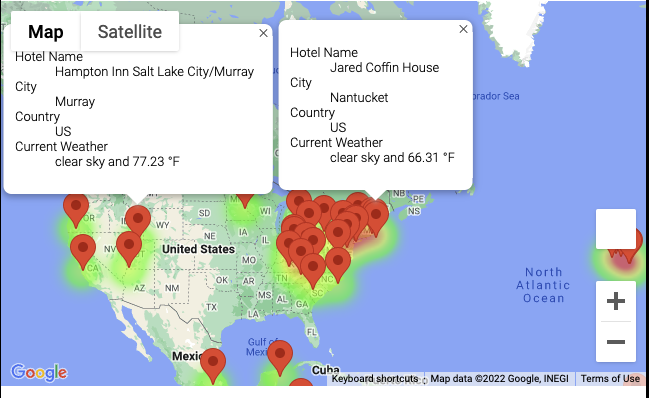

In [39]:
#Deliverable 6.2.18

import IPython
from IPython import display
display.Image('../Vacation_Search/vacation_map.png')